Receiving Data

In [130]:
import pandas as pd
import numpy as np

# trajectory_data = pd.read_csv("Uav trajectory data/uav_trajectory_data_random_waypoint.csv")
trajectory_data = pd.read_csv("Uav trajectory data/uav_trajectory_data_random_walk.csv")
# trajectory_data = pd.read_csv("Uav trajectory data/uav_trajectory_data_probabilistic.csv")


trajectory_data.head()

,UAV_ID,Time_Step,X,Y,Z
0,0,0,101.830204,701.606844,488.196403
1,1,0,563.370508,363.663857,164.708752
2,2,0,619.391772,959.833784,193.441856
3,3,0,324.209252,556.390562,467.543018
4,4,0,117.191780,791.175693,399.553268


Plotting Data

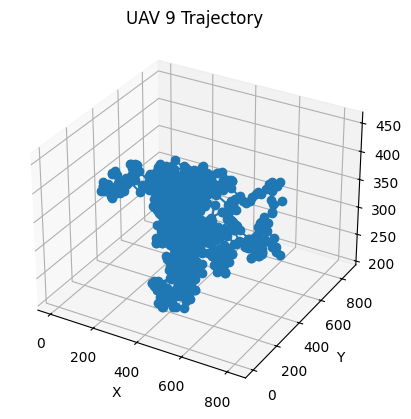

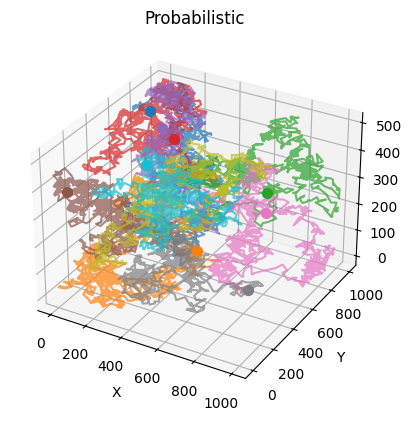

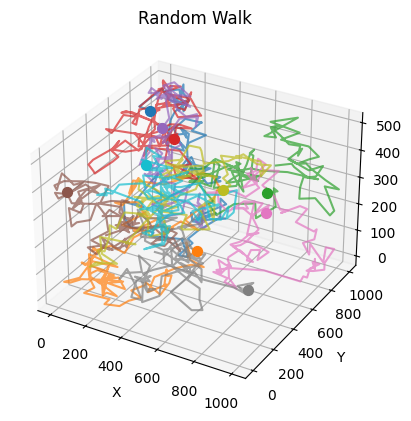

In [131]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data for plotting
uav_id = 9  # Choose a UAV ID to plot its trajectory
uav_data = trajectory_data[trajectory_data['UAV_ID'] == uav_id]

# Plot 3D trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(uav_data['X'], uav_data['Y'], uav_data['Z'], marker='o', linestyle='-')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'UAV {uav_id} Trajectory')
plt.show()




# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot each UAV's trajectory
# for uav_id in trajectory_data['UAV_ID'].unique():
#     uav_trajectory = trajectory_data[trajectory_data['UAV_ID'] == uav_id]
#     ax.plot(uav_trajectory['X'], uav_trajectory['Y'], uav_trajectory['Z'], label=f'UAV {uav_id}')

# # Set labels and title
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_title('UAV Trajectories')

# # Add legend
# ax.legend()

# # Show plot
# plt.show()






fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each UAV's trajectory with different color and transparency
for uav_id in trajectory_data['UAV_ID'].unique():
    uav_trajectory = trajectory_data[trajectory_data['UAV_ID'] == uav_id]
    ax.plot(uav_trajectory['X'], uav_trajectory['Y'], uav_trajectory['Z'], alpha=0.7, label=f'UAV {uav_id}')

# Add marker points at the start of each trajectory with different colors
for uav_id in trajectory_data['UAV_ID'].unique():
    uav_trajectory = trajectory_data[trajectory_data['UAV_ID'] == uav_id]
    ax.scatter(uav_trajectory['X'].iloc[0], uav_trajectory['Y'].iloc[0], uav_trajectory['Z'].iloc[0], c=f'C{uav_id}', marker='o', s=50, label=f'Start of UAV {uav_id}')


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Probabilistic')

# Add legend
# ax.legend()

# Show plot
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each UAV's trajectory with different color and transparency
for uav_id in trajectory_data['UAV_ID'].unique():
    uav_trajectory = trajectory_data[trajectory_data['UAV_ID'] == uav_id]
    
    # Interpolate trajectory points
    f = interp1d(uav_trajectory.index, uav_trajectory[['X', 'Y', 'Z']], axis=0)
    new_indexes = np.linspace(uav_trajectory.index.min(), uav_trajectory.index.max(), 100)
    new_points = f(new_indexes)
    
    ax.plot(*new_points.T, alpha=0.7, label=f'UAV {uav_id}')

# Add marker points at the start of each trajectory with different colors
for uav_id in trajectory_data['UAV_ID'].unique():
    uav_trajectory = trajectory_data[trajectory_data['UAV_ID'] == uav_id]
    ax.scatter(uav_trajectory['X'].iloc[0], uav_trajectory['Y'].iloc[0], uav_trajectory['Z'].iloc[0], c=f'C{uav_id}', marker='o', s=50, label=f'Start of UAV {uav_id}')


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Random Walk')

# Add legend
# ax.legend()

# Show plot
plt.show()


In [ ]:
# !pip install filterpy

Add Features

In [105]:
# # Group the data by UAV_ID and shift the X, Y, and Z columns by one time step
# trajectory_data['Previous_X'] = trajectory_data.groupby('UAV_ID')['X'].shift(1)
# trajectory_data['Previous_Y'] = trajectory_data.groupby('UAV_ID')['Y'].shift(1)
# trajectory_data['Previous_Z'] = trajectory_data.groupby('UAV_ID')['Z'].shift(1)

# # trajectory_data['Previous_X2'] = trajectory_data.groupby('UAV_ID')['X'].shift(2)
# # trajectory_data['Previous_Y2'] = trajectory_data.groupby('UAV_ID')['Y'].shift(2)
# # trajectory_data['Previous_Z2'] = trajectory_data.groupby('UAV_ID')['Z'].shift(2)

# # Drop rows with missing previous trajectory coordinates
# trajectory_data.dropna(subset=['Previous_X', 'Previous_Y', 'Previous_Z'], inplace=True) #, 'Previous_X2', 'Previous_Y2', 'Previous_Z2'


Splitting Data

In [106]:
from sklearn.model_selection import train_test_split
# Split features and target
X = trajectory_data[['X', 'Y', 'Z']]#,  'Previous_X', 'Previous_Y', 'Previous_Z'  ,'Previous_X2', 'Previous_Y2', 'Previous_Z2' 'Speed', 'Acceleration', 'Altitude'
y = trajectory_data[['X', 'Y', 'Z']]

print(len(X))

# Shift the target by one time step to get the next trajectory
# y = trajectory_data[['X', 'Y', 'Z']].shift(-1) #predict after 1 second
y = trajectory_data[['X', 'Y', 'Z']].shift(-5) #predict after 5 second
y = y.dropna()

# Drop the last row from X to align with the shifted y
# X = X[:-1] #for predicting trajectory after 1 second
X = X[:-5]   #for predicting trajectory after 5 second

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.head(6))
y.head(6)

10000
            X           Y           Z
0  118.648330  692.491633  151.088105
1  125.428899  686.664569  155.567972
2  126.920513  676.955410  153.695189
3  136.271344  675.630798  156.982646
4  144.866944  675.761340  162.091327
5  147.888571  666.289262  161.019172


,X,Y,Z
0,147.888571,666.289262,161.019172
1,149.081714,657.548389,165.728052
2,158.051749,660.373602,169.127560
3,162.502209,651.700274,171.356190
4,172.417603,650.514903,170.827162
5,180.432327,647.013773,175.675490


Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)


from sklearn.metrics import mean_absolute_error, r2_score
# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Root Mean Squared Error (Train):", rmse_train)
print("Root Mean Squared Error (Test):", rmse_test)
print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)


#______________________________________________________________________________

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the polynomial degree
degree = 2

# Create a pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred_train_poly = model.predict(X_train)
y_pred_test_poly = model.predict(X_test)

# Evaluate model performance
mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

# Print mean squared errors
print("\n\nMean Squared Error (Train) 2nd degree:", mse_train_poly)
print("PMean Squared Error (Test) 2nd degree:", mse_test_poly)

from sklearn.metrics import mean_absolute_error, r2_score
# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Root Mean Squared Error (Train):", rmse_train)
print("Root Mean Squared Error (Test):", rmse_test)
print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)


Mean Squared Error (Train): 436.63108317999286
Mean Squared Error (Test): 400.8298277236101
Root Mean Squared Error (Train): 20.895719254909434
Root Mean Squared Error (Test): 20.02073494464202
Mean Absolute Error (Train): 10.602931990770324
Mean Absolute Error (Test): 10.4993749736476
R-squared (Train): 0.8325811631455399
R-squared (Test): 0.8475954500337184


Mean Squared Error (Train) 2nd degree: 435.91284033673105
PMean Squared Error (Test) 2nd degree: 400.8187768220574
Root Mean Squared Error (Train): 20.895719254909434
Root Mean Squared Error (Test): 20.02073494464202
Mean Absolute Error (Train): 10.602931990770324
Mean Absolute Error (Test): 10.4993749736476
R-squared (Train): 0.8325811631455399
R-squared (Test): 0.8475954500337184


xgboost

In [108]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Evaluate model performance
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)

# Print mean squared errors
print("XGBoost Mean Squared Error (Train):", mse_train_xgb)
print("XGBoost Mean Squared Error (Test):", mse_test_xgb)

from sklearn.metrics import mean_absolute_error, r2_score
# Calculate RMSE
rmse_train_xgb = np.sqrt(mse_train_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)

# Calculate MAE
mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

# Calculate R-squared
r2_train = r2_score(y_train, y_pred_train_xgb)
r2_test = r2_score(y_test, y_pred_test_xgb)

# Print evaluation metrics
print("Root Mean Squared Error (Train):", rmse_train_xgb)
print("Root Mean Squared Error (Test):", rmse_test_xgb)
print("Mean Absolute Error (Train):", mae_train_xgb)
print("Mean Absolute Error (Test):", mae_test_xgb)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)


XGBoost Mean Squared Error (Train): 93.36967967413405
XGBoost Mean Squared Error (Test): 456.68909820685946
Root Mean Squared Error (Train): 9.662798749541151
Root Mean Squared Error (Test): 21.370285403027715
Mean Absolute Error (Train): 7.054145893201685
Mean Absolute Error (Test): 11.59812000912924
R-squared (Train): 0.9615210210110191
R-squared (Test): 0.8344834246695693


Gradient Boosting Regressor

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Initialize and train the models for each coordinate
gb_models = []
y_pred_train_gb = []
y_pred_test_gb = []
mse_train_gb = []
mse_test_gb = []

for i in range(3):  # Loop over X, Y, Z coordinates
    # Initialize and train the model
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train.iloc[:, i])  # Train using only the i-th coordinate

    # Make predictions for train and test sets
    y_pred_train = gb_model.predict(X_train)
    y_pred_test = gb_model.predict(X_test)

    # Store predictions and calculate MSE
    y_pred_train_gb.append(y_pred_train)
    y_pred_test_gb.append(y_pred_test)
    mse_train_gb.append(mean_squared_error(y_train.iloc[:, i], y_pred_train))
    mse_test_gb.append(mean_squared_error(y_test.iloc[:, i], y_pred_test))

    gb_models.append(gb_model)

# Calculate total mean squared error
total_mse_train_gb = np.mean(mse_train_gb)
total_mse_test_gb = np.mean(mse_test_gb)

# Print total mean squared error
print("Gradient Boosting Total Mean Squared Error (Train):", total_mse_train_gb)
print("Gradient Boosting Total Mean Squared Error (Test):", total_mse_test_gb)

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse_train_gb = np.sqrt(total_mse_train_gb)
rmse_test_gb = np.sqrt(total_mse_test_gb)

# Calculate MAE
mae_train_gb = mean_absolute_error(y_train, np.array(y_pred_train_gb).T)
mae_test_gb = mean_absolute_error(y_test, np.array(y_pred_test_gb).T)

# Calculate R-squared
r2_train_gb = r2_score(y_train, np.array(y_pred_train_gb).T)
r2_test_gb = r2_score(y_test, np.array(y_pred_test_gb).T)

# Print evaluation metrics
print("Root Mean Squared Error (Train):", rmse_train_gb)
print("Root Mean Squared Error (Test):", rmse_test_gb)
print("Mean Absolute Error (Train):", mae_train_gb)
print("Mean Absolute Error (Test):", mae_test_gb)
print("R-squared (Train):", r2_train_gb)
print("R-squared (Test):", r2_test_gb)


Gradient Boosting Total Mean Squared Error (Train): 307.32532487133614
Gradient Boosting Total Mean Squared Error (Test): 371.45281304234095
Root Mean Squared Error (Train): 17.530696645351437
Root Mean Squared Error (Test): 19.273111140714697
Mean Absolute Error (Train): 10.107181939734405
Mean Absolute Error (Test): 10.642061285183072
R-squared (Train): 0.879895739685371
R-squared (Test): 0.854581374995156


MLP

In [110]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_train_mlp = mlp_model.predict(X_train)
y_pred_test_mlp = mlp_model.predict(X_test)

# Evaluate model performance
mse_train_mlp = mean_squared_error(y_train, y_pred_train_mlp)
mse_test_mlp = mean_squared_error(y_test, y_pred_test_mlp)

# Print mean squared errors
print("MLP Mean Squared Error (Train):", mse_train_mlp)
print("MLP Mean Squared Error (Test):", mse_test_mlp)

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse_train_mlp = np.sqrt(mse_train_mlp)
rmse_test_mlp = np.sqrt(mse_test_mlp)

# Calculate MAE
mae_train_mlp = mean_absolute_error(y_train, y_pred_train_mlp)
mae_test_mlp = mean_absolute_error(y_test, y_pred_test_mlp)

# Calculate R-squared
r2_train_mlp = r2_score(y_train, y_pred_train_mlp)
r2_test_mlp = r2_score(y_test, y_pred_test_mlp)

# Print evaluation metrics
print("Root Mean Squared Error (Train):", rmse_train_mlp)
print("Root Mean Squared Error (Test):", rmse_test_mlp)
print("Mean Absolute Error (Train):", mae_train_mlp)
print("Mean Absolute Error (Test):", mae_test_mlp)
print("R-squared (Train):", r2_train_mlp)
print("R-squared (Test):", r2_test_mlp)


MLP Mean Squared Error (Train): 453.02407805943045
MLP Mean Squared Error (Test): 415.7039418461936
Root Mean Squared Error (Train): 21.284362289235503
Root Mean Squared Error (Test): 20.38881904000802
Mean Absolute Error (Train): 11.060969387400727
Mean Absolute Error (Test): 10.953273966177534
R-squared (Train): 0.8244062288180332
R-squared (Test): 0.8404555741599992


KNN

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for KNN regressor
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# Initialize KNN regressor
knn = KNeighborsRegressor()

# Use GridSearchCV to find the best parameter (K)
model = GridSearchCV(knn, params, cv=5)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model performance (using mean squared error)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Root Mean Squared Error (Train):", rmse_train)
print("Root Mean Squared Error (Test):", rmse_test)
print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)



Mean Squared Error (Train): 343.0797497067346
Mean Squared Error (Test): 372.20241812509806
Root Mean Squared Error (Train): 18.522412092023398
Root Mean Squared Error (Test): 19.29254825379732
Mean Absolute Error (Train): 10.059876605665833
Mean Absolute Error (Test): 10.769650117514729
R-squared (Train): 0.8660429854591235
R-squared (Test): 0.8559417218091179


Random Forest

In [112]:
#just previous 1 is good
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


model = RandomForestRegressor(n_estimators=31, min_samples_split=5, random_state=1)

model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Root Mean Squared Error (Train):", rmse_train)
print("Root Mean Squared Error (Test):", rmse_test)
print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)


Mean Squared Error (Train): 113.11815084499625
Mean Squared Error (Test): 428.68506098576216
Root Mean Squared Error (Train): 10.63570170910205
Root Mean Squared Error (Test): 20.704711081919548
Mean Absolute Error (Train): 5.988763266272284
Mean Absolute Error (Test): 11.054217776433262
R-squared (Train): 0.9541756342896024
R-squared (Test): 0.8408566623750077


LSTM type of recurrent neural network (RNN)

In [113]:
#better not to use previous X,Y,Z
#decrease the batch_size, increase the LSTM units and epochs
# import numpy as np
# from keras.models import Sequential
# from keras.layers import LSTM, Dense
# from sklearn.metrics import mean_squared_error

# # Reshape data for LSTM input (samples, timesteps, features)
# X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
# X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# # Initialize LSTM model
# lstm_model = Sequential()
# lstm_model.add(LSTM(units=100, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
# lstm_model.add(Dense(units=3))  # Output layer with 3 units for X, Y, Z coordinates

# # Compile the model
# lstm_model.compile(optimizer='adam', loss='mse')

# # Train the model
# lstm_model.fit(X_train_lstm, y_train, epochs=4000, batch_size=128, verbose=1)

# # Make predictions
# lstm_y_pred_train = lstm_model.predict(X_train_lstm)
# lstm_y_pred_test = lstm_model.predict(X_test_lstm)

# # Evaluate model performance
# lstm_mse_train = mean_squared_error(y_train, lstm_y_pred_train)
# lstm_mse_test = mean_squared_error(y_test, lstm_y_pred_test)

# print("LSTM Mean Squared Error (Train):", lstm_mse_train)
# print("LSTM Mean Squared Error (Test):", lstm_mse_test)




# import numpy as np
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout
# from keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error

# # Reshape data for LSTM input (samples, timesteps, features)
# X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
# X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# # Initialize LSTM model
# lstm_model = Sequential()
# lstm_model.add(LSTM(units=200, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
# lstm_model.add(Dropout(0.2))
# lstm_model.add(LSTM(units=100))
# lstm_model.add(Dense(units=3))  # Output layer with 3 units for X, Y, Z coordinates

# # Compile the model
# optimizer = Adam(learning_rate=0.001)  # Adjusted parameter name
# lstm_model.compile(optimizer=optimizer, loss='mse')

# # Train the model
# lstm_model.fit(X_train_lstm, y_train, epochs=10000, batch_size=128, verbose=1)

# # Make predictions
# lstm_y_pred_train = lstm_model.predict(X_train_lstm)
# lstm_y_pred_test = lstm_model.predict(X_test_lstm)

# # Evaluate model performance
# lstm_mse_train = mean_squared_error(y_train, lstm_y_pred_train)
# lstm_mse_test = mean_squared_error(y_test, lstm_y_pred_test)

# print("LSTM Mean Squared Error (Train):", lstm_mse_train)
# print("LSTM Mean Squared Error (Test):", lstm_mse_test)



import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Reshape data for LSTM input (samples, timesteps, features)
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Initialize LSTM model
lstm_model = Sequential([
    LSTM(units=128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu', return_sequences=True),
    LSTM(units=64, activation='relu', return_sequences=True),
    LSTM(units=32, activation='relu'),
    Dense(units=3)  # Output layer with 3 units for X, Y, Z coordinates
])

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjusted parameter name
lstm_model.compile(optimizer=optimizer, loss='mse')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_train_lstm = lstm_model.predict(X_train_lstm)
y_pred_test_lstm = lstm_model.predict(X_test_lstm)

# Evaluate model performance
mse_train_lstm = mean_squared_error(y_train, y_pred_train_lstm)
mse_test_lstm = mean_squared_error(y_test, y_pred_test_lstm)

# Print mean squared errors
print("LSTM Mean Squared Error (Train):", mse_train_lstm)
print("LSTM Mean Squared Error (Test):", mse_test_lstm)

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse_train_lstm = np.sqrt(mse_train_lstm)
rmse_test_lstm = np.sqrt(mse_test_lstm)

# Calculate MAE
mae_train_lstm = mean_absolute_error(y_train, y_pred_train_lstm)
mae_test_lstm = mean_absolute_error(y_test, y_pred_test_lstm)

# Calculate R-squared
r2_train_lstm = r2_score(y_train, y_pred_train_lstm)
r2_test_lstm = r2_score(y_test, y_pred_test_lstm)

# Print evaluation metrics
print("LSTM Root Mean Squared Error (Train):", rmse_train_lstm)
print("LSTM Root Mean Squared Error (Test):", rmse_test_lstm)
print("LSTM Mean Absolute Error (Train):", mae_train_lstm)
print("LSTM Mean Absolute Error (Test):", mae_test_lstm)
print("LSTM R-squared (Train):", r2_train_lstm)
print("LSTM R-squared (Test):", r2_test_lstm)


Epoch 1/100


C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 93554.1797 - val_loss: 1126.3384
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 842.9273 - val_loss: 688.8512
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 436.5354 - val_loss: 596.2620
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 488.2756 - val_loss: 553.4897
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 467.6425 - val_loss: 554.0449
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 513.0651 - val_loss: 548.9018
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 519.4348 - val_loss: 540.9451
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 511.4024 - val_loss: 547.8492
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 391.7436 - val_loss: 552.4397
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 398.5812 - val_loss: 550.5146
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 375.7425 - val_loss: 540.9433
Epoch 

Kalman Filter

In [114]:
# !pip install filterpy

In [115]:
import numpy as np
from filterpy.kalman import KalmanFilter
from sklearn.metrics import mean_squared_error

# Initialize Kalman Filter
kf = KalmanFilter(dim_x=9, dim_z=3)  # State vector has 9 dimensions (X, Y, Z, VX, VY, VZ, AX, AY, AZ), Measurement has 3 dimensions (X, Y, Z)

# Define state transition matrix (constant acceleration model)
dt = 1.0  # Time step
# Initialize Kalman Filter with adjusted noise covariance matrices
kf_adjusted = KalmanFilter(dim_x=6, dim_z=3)

# Define state transition matrix (constant velocity model)
kf_adjusted.F = np.array([[1, 0, 0, dt, 0, 0],
                          [0, 1, 0, 0, dt, 0],
                          [0, 0, 1, 0, 0, dt],
                          [0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 1, 0],
                          [0, 0, 0, 0, 0, 1]])

# Define measurement matrix
kf_adjusted.H = np.array([[1, 0, 0, 0, 0, 0],
                          [0, 1, 0, 0, 0, 0],
                          [0, 0, 1, 0, 0, 0]])

# Adjust measurement noise covariance matrix
kf_adjusted.R = np.eye(3) * 0.001  # Reduce measurement noise covariance

# Adjust process noise covariance matrix (Q)
kf_adjusted.Q = np.diag([0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001])  # Reduce process noise covariance

# Initialize state estimate (initial position and velocity)
kf_adjusted.x = np.array([X_train.iloc[0, 0], X_train.iloc[0, 1], X_train.iloc[0, 2], 0, 0, 0])

# Initialize state covariance
kf_adjusted.P = np.eye(6)

# Predict and update for each time step
y_pred_test_kalman_adjusted = []
for i in range(len(X_test)):
    # Predict next state
    kf_adjusted.predict()

    # Update state with measurement
    kf_adjusted.update(np.array([X_test.iloc[i, 0], X_test.iloc[i, 1], X_test.iloc[i, 2]]))

    # Store predicted state
    y_pred_test_kalman_adjusted.append(kf_adjusted.x[:3])

# Convert predictions to numpy array
y_pred_test_kalman_adjusted = np.array(y_pred_test_kalman_adjusted)

# Evaluate model performance
mse_test_kalman_adjusted = mean_squared_error(y_test, y_pred_test_kalman_adjusted)

print("Adjusted Kalman Filter Mean Squared Error (Test):", mse_test_kalman_adjusted)
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse_test_kalman_adjusted = np.sqrt(mse_test_kalman_adjusted)

# Calculate MAE
mae_test_kalman_adjusted = mean_absolute_error(y_test, y_pred_test_kalman_adjusted)

# Calculate R-squared
r2_test_kalman_adjusted = r2_score(y_test, y_pred_test_kalman_adjusted)

# Print evaluation metrics
print("Adjusted Kalman Filter Root Mean Squared Error (Test):", rmse_test_kalman_adjusted)
print("Adjusted Kalman Filter Mean Absolute Error (Test):", mae_test_kalman_adjusted)
print("Adjusted Kalman Filter R-squared (Test):", r2_test_kalman_adjusted)


Adjusted Kalman Filter Mean Squared Error (Test): 1211.3492747999096
Adjusted Kalman Filter Root Mean Squared Error (Test): 34.80444331978188
Adjusted Kalman Filter Mean Absolute Error (Test): 21.7370189099489
Adjusted Kalman Filter R-squared (Test): 0.5908816362813871


 Multilayer Perceptron (MLP) type of feedforward neural network (FNN)

In [116]:
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # Assuming X_train, X_test, y_train, y_test are already defined

# # Initialize the neural network model
# model = Sequential()

# # Add input layer
# model.add(Dense(units=512, input_dim=X_train.shape[1], activation='relu'))

# # Add hidden layers
# model.add(Dense(units=1024, activation='relu'))
# model.add(Dropout(0.2))  # Adding dropout for regularization

# model.add(Dense(units=512, activation='relu'))
# model.add(Dropout(0.2))

# # Add output layer
# model.add(Dense(units=3))  # Output layer with 3 units for X, Y, Z coordinates

# # Compile the model
# optimizer = Adam(learning_rate=0.001)  # Adjusted parameter name
# model.compile(optimizer=optimizer, loss='mse')

# # Train the model
# model.fit(X_train, y_train, epochs=150, batch_size=128, validation_split=0.2, verbose=1)

# # Make predictions
# y_pred_train_nn = model.predict(X_train)
# y_pred_test_nn = model.predict(X_test)

# # Evaluate model performance
# mse_train_nn = mean_squared_error(y_train, y_pred_train_nn)
# mse_test_nn = mean_squared_error(y_test, y_pred_test_nn)

# print("Neural Network Mean Squared Error (Train):", mse_train_nn)
# print("Neural Network Mean Squared Error (Test):", mse_test_nn)




import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Define the neural network architecture
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3)  # Output layer with 3 units for X, Y, Z coordinates
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_train_nn = model.predict(X_train)
y_pred_test_nn = model.predict(X_test)

# Evaluate model performance
mse_train_nn = mean_squared_error(y_train, y_pred_train_nn)
mse_test_nn = mean_squared_error(y_test, y_pred_test_nn)

# Print mean squared errors
print("Neural Network Mean Squared Error (Train):", mse_train_nn)
print("Neural Network Mean Squared Error (Test):", mse_test_nn)

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse_train_nn = np.sqrt(mse_train_nn)
rmse_test_nn = np.sqrt(mse_test_nn)

# Calculate MAE
mae_train_nn = mean_absolute_error(y_train, y_pred_train_nn)
mae_test_nn = mean_absolute_error(y_test, y_pred_test_nn)

# Calculate R-squared
r2_train_nn = r2_score(y_train, y_pred_train_nn)
r2_test_nn = r2_score(y_test, y_pred_test_nn)

# Print evaluation metrics
print("Neural Network Root Mean Squared Error (Train):", rmse_train_nn)
print("Neural Network Root Mean Squared Error (Test):", rmse_test_nn)
print("Neural Network Mean Absolute Error (Train):", mae_train_nn)
print("Neural Network Mean Absolute Error (Test):", mae_test_nn)
print("Neural Network R-squared (Train):", r2_train_nn)
print("Neural Network R-squared (Test):", r2_test_nn)

Epoch 1/100


C:\Users\univm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 92525.0234 - val_loss: 677.9163
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 496.8201 - val_loss: 554.0422
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 463.9881 - val_loss: 522.4579
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 431.7968 - val_loss: 534.6007
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 529.6696 - val_loss: 556.5641
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 412.3301 - val_loss: 537.0939
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 498.4030 - val_loss: 576.9061
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 469.7273 - val_loss: 573.5076
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 412.9099 - val_loss: 520.7631
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 516.9755 - val_loss: 541.5255
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 530.0544 - val_loss: 531.3420
Epoch 1